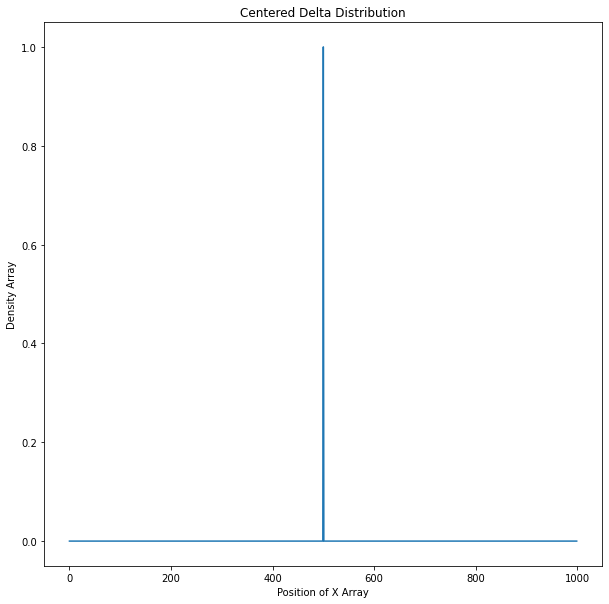

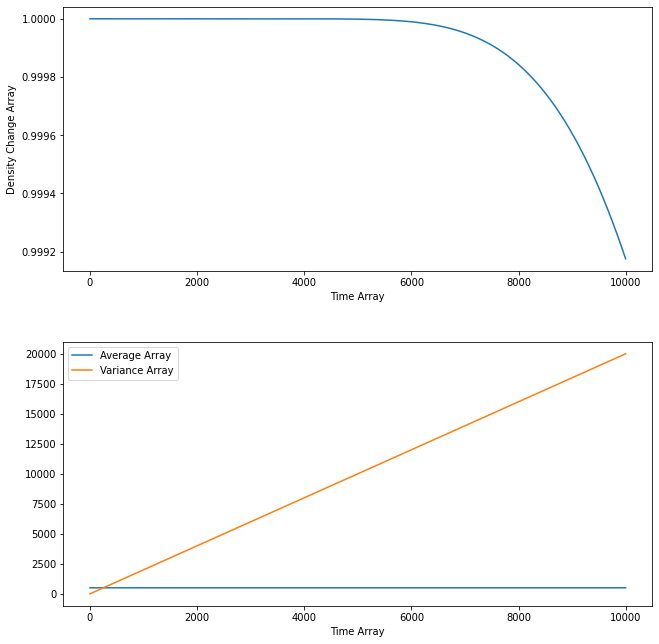

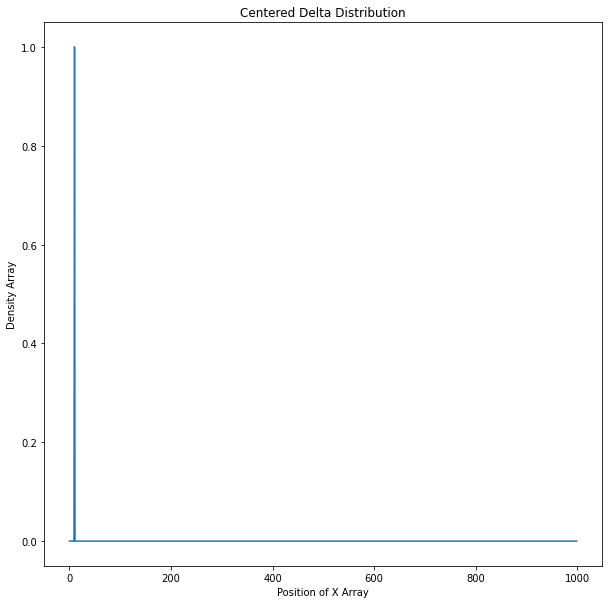

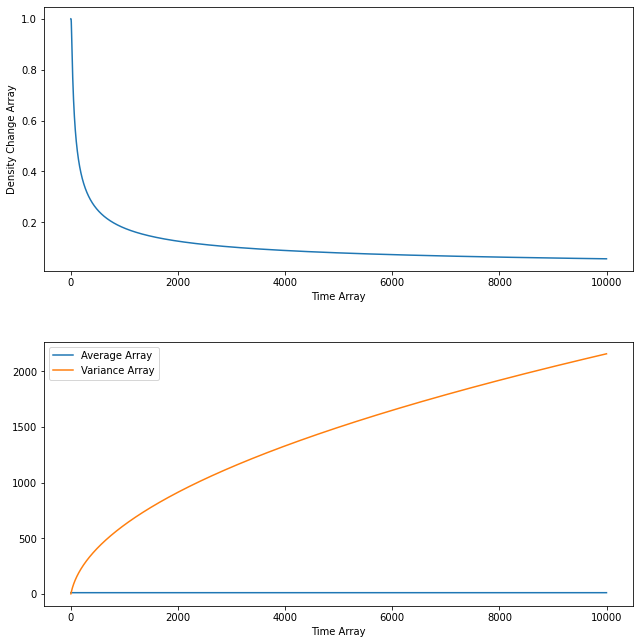

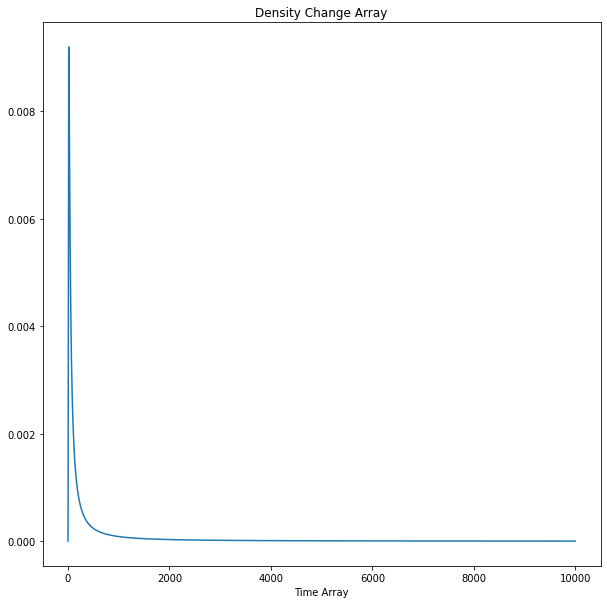

r value:  10.0


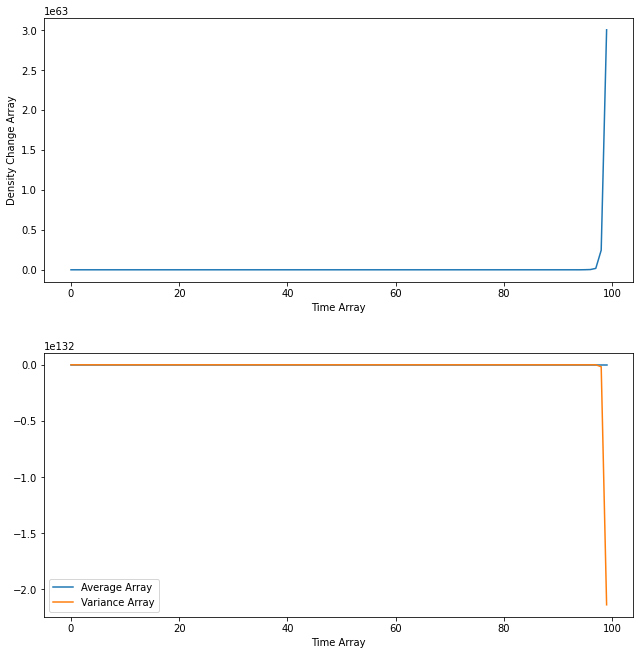

r value:  100.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: overflow encountered in double_scalars


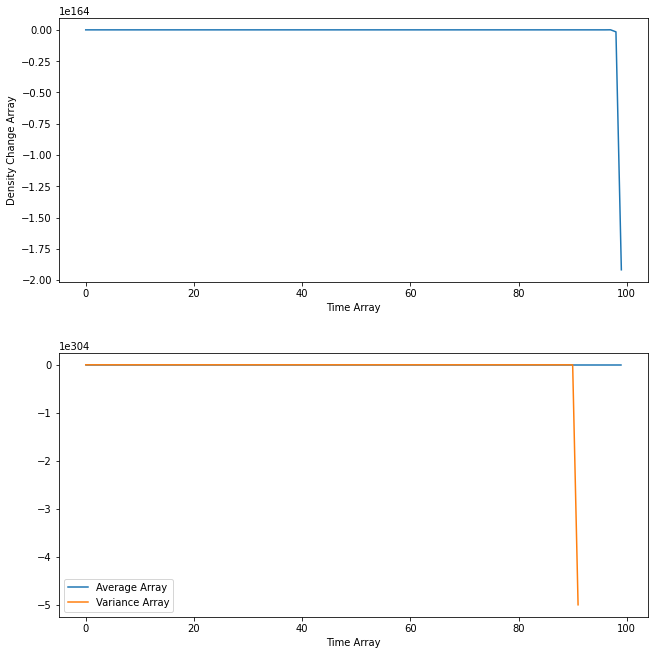

r value:  1000.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: overflow encountered in double_scalars


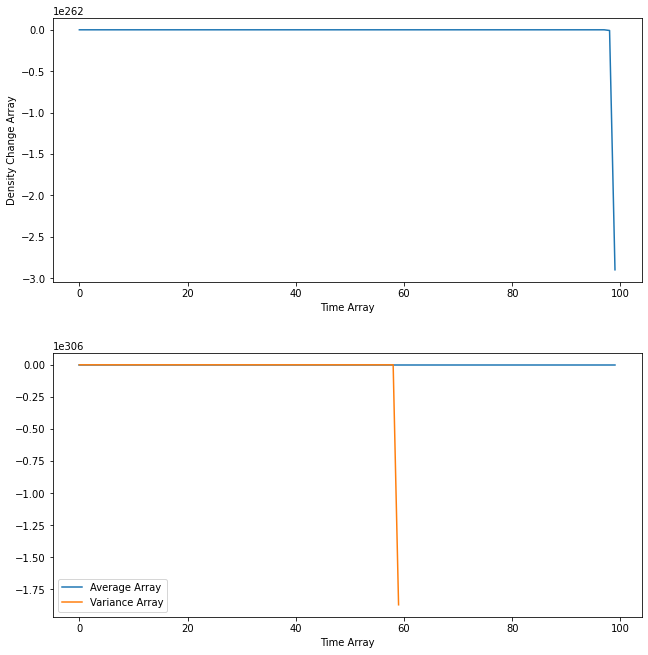

r value:  10.0


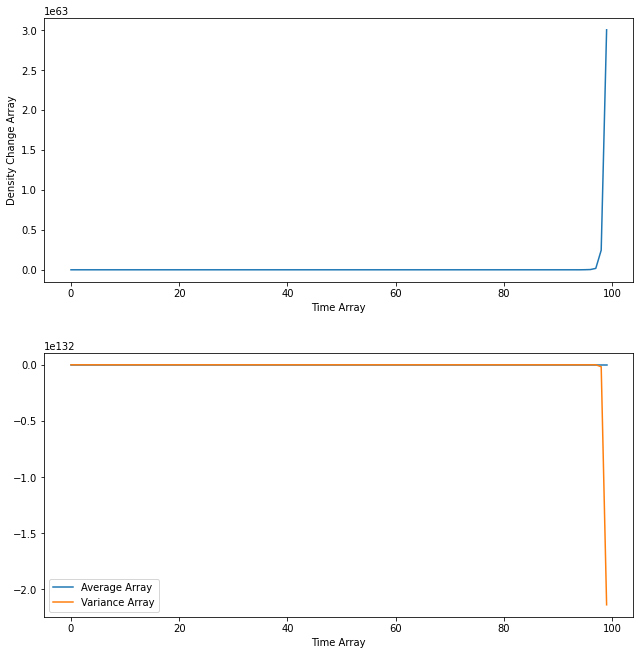

r value:  100.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: overflow encountered in double_scalars


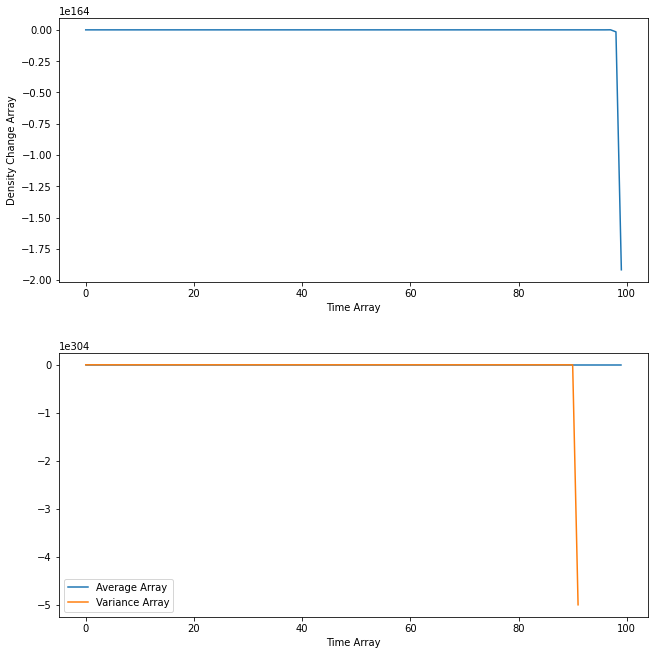

r value:  1000.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: overflow encountered in double_scalars


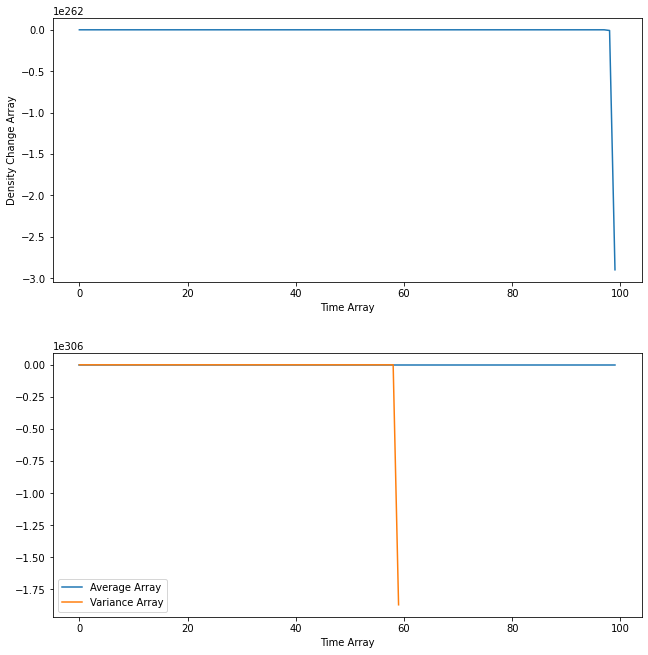

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.linalg import solve_banded



# Setting all the parameteres as per the requirement. 


# Setting Parameters

n, dt, dx, D = 1000, 0.5, 1, 2 
r = (D*dt) / (dx**2)



# Spatial region

x = []

for i in range(n):
  x = np.append(x,(i * dx))

P_curr, P_next= np.zeros(n), np.zeros(n)



# Setting the  Boundary conditions

setting_boundry = np.zeros(n)
setting_boundry[0], setting_boundry[n-1] = 0, 0  # First and last



# Constructing a Matrix AB

AB = np.vstack(([0, 0] + [-r] * (n-2), [1] + [2 * (1+r)] * (n-2) + [1], [-r] * (n-2) + [0, 0]))



# All the Graphs

def plotA(setting_x_array, density_array, average_value_array,variance_value_array):

    fig, axs = plt.subplots(2, figsize=(10, 10))
    fig.tight_layout(pad=5.0)

    axs[0].plot(setting_x_array, density_array)
    axs[0].set_xlabel('Time Array')
    axs[0].set_ylabel('Density Change Array')

    axs[1].plot(setting_x_array, average_value_array, label="Average Array")
    axs[1].plot(setting_x_array, variance_value_array, label="Variance Array")
    axs[1].set_xlabel('Time Array')
    axs[1].legend()
    plt.show()




def plotB(setting_x_array, density_change_array):

  plt.figure(figsize=(10, 10))
  plt.plot(setting_x_array, density_change_array)
  plt.title('Density Change Array')
  plt.xlabel('Time Array')
  plt.show()





def plotC(P_curr):

  plt.figure(figsize=(10, 10))
  plt.plot(np.arange(0, n, 1), P_curr)
  plt.title('Centered Delta Distribution')
  plt.xlabel('Position of X Array')
  plt.ylabel('Density Array')
  plt.show()




def B_Matrix_function(P_curr, r):

# Returns the matrix by setting_boundry for the current P_curr.

    for i in range(1, n-1):
        setting_boundry[i] = r * P_curr[i-1] + 2 * (1-r) * P_curr[i] + r * P_curr[i+1]
    return setting_boundry
    
def B_solver(P_curr, r):

# Solving for P_next and returning updated P_next. 

    result_array_P_next = solve_banded((1,1), AB, B_Matrix_function(P_curr, r))
    return result_array_P_next



#  Plot the density, mean, and variance for the conditions for the diffusion. 


def  solver_for_var_avg_plot(P_curr, r, calc_density=False):


    average_value_array, variance_value_array, density_array  = [], [], []


    for t in range(N):
        density = 0

        for i in range(n):
            density = density + P_curr[i]
        density_array = np.append(density_array, density)
        expectation_value, dummy_variance = 0, 0

        for i in range(n):
            expectation_value = expectation_value + (x[i] * P_curr[i])
            dummy_variance = dummy_variance +((x[i]**2) * P_curr[i])

        variance = dummy_variance - ((expectation_value)**2)
        P_next = B_solver(P_curr, r)
        P_curr = P_next
        average_value_array = np.append(average_value_array,expectation_value)
        variance_value_array = np.append(variance_value_array,variance)

    setting_x_array = np.arange(0, N, 1)

    plotA(setting_x_array, density_array, average_value_array,variance_value_array)

    if calc_density == True:

      density_change_array = np.abs(np.diff(density_array))
      setting_x_array = np.arange(0, N-1, 1)

      plotB(setting_x_array, density_change_array)

    return None



N = 10000 # Number of iterations in time

# Delta distribution picked at the center
P_curr[int(n/2)] = 1

plotC(P_curr)

solver_for_var_avg_plot(P_curr, r)




# 2. Solving for Shifted Delta Distribution along with Plot of $\Delta P_{tot}$



# Shifted delta distribution near the boundary


P_curr = np.zeros(n)
P_curr[10] = 1

plotC(P_curr)

solver_for_var_avg_plot(P_curr, r, calc_density=True)



D = [20, 200, 2000]

for i in D:

  r_values = np.append(r_values , (i * (dt/(dx**2))))

# Centered Delta Distribution

P_curr = np.zeros(n)
P_curr[int(n/2)] = 1

N = 100

for r in r_values:

    print("r value: ", r)
    solver_for_var_avg_plot(P_curr, r)



In this project, the diffusion equation is solved numerically using the Crank-Nicolson method for fixed boundary conditions and initial conditions as delta distribution.
The banded matrix AB is  3 by N  with 3 rows, the matrix has upper diagonal, main diagonal and the lower diagonal of the first matrix A. From a graph of  P(x,t)  with the initial condition set to have the delta function at the centre 0 of the distribution for the time span of t. It is observed that it remains constant but eventually starts to decrease after some time  because the centred gas molecules start to diffuse and gas spreads up-to the boundary of the box. At this point in the process the boundary condition is set to zero and is also the reason the density decreases after a long time period. The average of the slope remains constant over all time but as mentioned in the lecture it should go to 0 as time reaches infinity and variance is observed to linearly grow with time.

When the delta distribution is centred near the boundary.The total density P_tot decreases exponentially because the gas being closer to the boundary reaches the boundary and the density decreases quickly and the mean approaches 0 as time is set to continue for a long period but variance increases quadratically and is linear after a certain time period. The change in density is explained by the Smirnov density, which is heavy-tailed with a stable distribution.
Changing the values or r by magnitude could not generate a stable solution for the diffusion equations. For r_values = [200, 200, 1000], the diffusion equation was solved. For those values of  r , the variance is no longer linear, the density increases, and the mean is constant for rapidly changing densities too.
